In [1]:
# You can easily and quickly test new code in a notebook
# before adding it to the survey (the __ini__.py file)
import os

import matplotlib.pyplot as plt
import seaborn as sns
from flask_login import current_user
from hemlock import User, Page, create_test_app, utils
from hemlock.functional import compile, validate, test_response
from hemlock.questions import Check, Input, Label, Range, Select, Textarea
from hemlock_ax import Assigner, init_test_app, run_test
from scipy.stats import norm
from sqlalchemy_mutable.utils import partial

assigner = Assigner({"factor0": (0, 1), "factor1": (0, 1, 2)})


def seed():
    assignment = assigner.assign_user()
    return [
        Page(
            input := Input(
                f"You were assigned to {assignment}",
                input_tag={"type": "number"},
                variable="target",
                test_response=partial(make_test_response, assignment)
            )
        ),
        Page(
            Label(compile=partial(display_target, input)),
        )
    ]


def make_test_response(input, assignment):
    return sum(assignment.values()) + 10 * norm().rvs()


def display_target(display_label, input):
    display_label.label = f"Target value is {input.response}."


# get a test user started on the survey
sns.set()
app = create_test_app()
init_test_app(app)
df = run_test(100, seed)[0]
df.head()

Traceback (most recent call last):
  File "C:\Users\DBSpe\anaconda3\envs\hemlock-ax-template\lib\site-packages\hemlock_ax\assign.py", line 209, in fit_model
    return model(self.get_data(), **self.model_kwargs)
  File "C:\Users\DBSpe\anaconda3\envs\hemlock-ax-template\lib\site-packages\hemlock_ax\models.py", line 40, in linear_regression
    df = df.dropna(subset=exog_names + [endog_name])
  File "C:\Users\DBSpe\anaconda3\envs\hemlock-ax-template\lib\site-packages\pandas\util\_decorators.py", line 311, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\DBSpe\anaconda3\envs\hemlock-ax-template\lib\site-packages\pandas\core\frame.py", line 5953, in dropna
    raise KeyError(list(np.compress(check, subset)))
KeyError: ['factor0', 'factor1', 'target']
C:\Users\DBSpe\anaconda3\envs\hemlock-ax-template\lib\site-packages\hemlock_ax\assign.py:212: RuntimeWarning: MODEL FAILED TO FIT
This warning is normal early in the study when there are not enough data to fit the model. If you con

,n_assigned_users,assignment,pr_best,weight,cum_assigned
0,14,"(0.0, 0.0)",0.000,0.000000,2
1,14,"(0.0, 1.0)",0.000,0.000000,3
2,14,"(0.0, 2.0)",0.168,0.428595,3
3,14,"(1.0, 0.0)",0.000,0.000000,2
4,14,"(1.0, 1.0)",0.029,0.086344,2


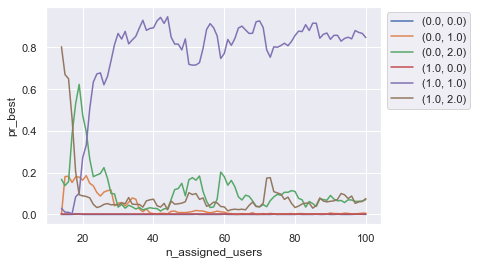

In [2]:
sns.lineplot(data=df, x="n_assigned_users", y="pr_best", hue="assignment")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

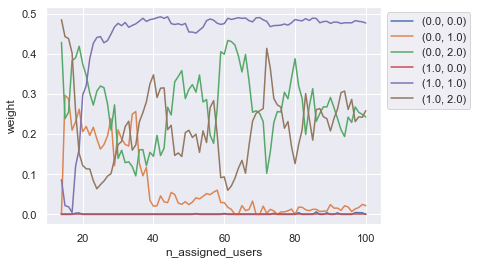

In [3]:
sns.lineplot(data=df, x="n_assigned_users", y="weight", hue="assignment")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

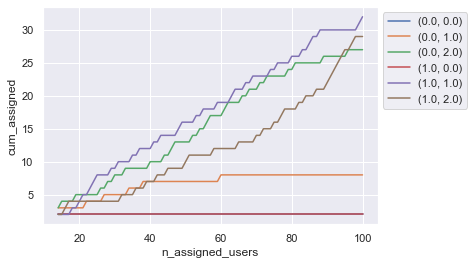

In [4]:
sns.lineplot(data=df, x="n_assigned_users", y="cum_assigned", hue="assignment")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()